In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# reading the csv file, del 2 columns from the file, checking first few rows of the file
df = pd.read_csv('Social_Network_Ads.csv')
# data.drop(columns=['User ID','Gender',],axis=1,inplace=True)
df.drop(columns=['User ID'],axis=1,inplace=True)
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [28]:
df.describe()


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [31]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [32]:
df.isnull().sum()


Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\eng20\AppData\Local\Temp\ipykernel_62384\1481425020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0],x= df['Age'], palette = "Set1")


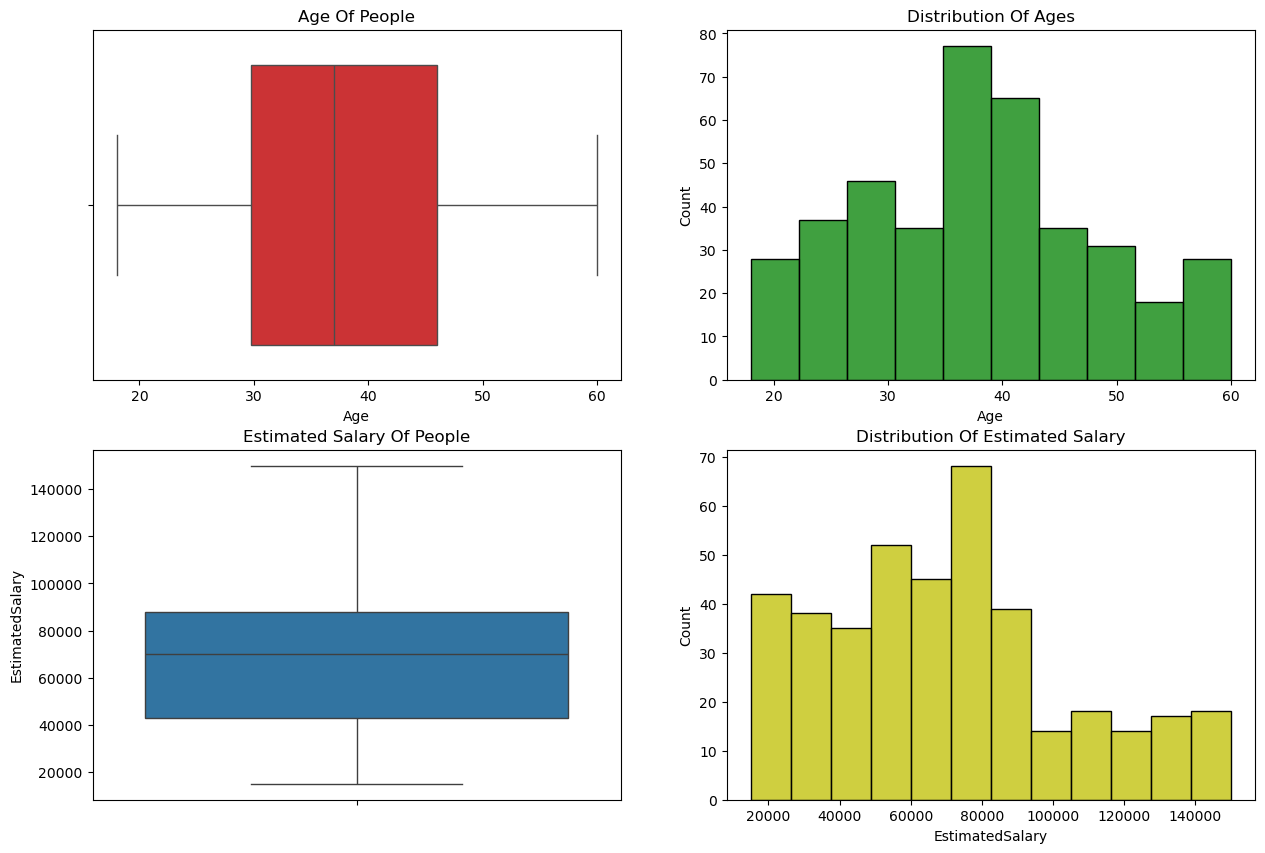

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0,0],x= df['Age'], palette = "Set1")
axes[0,0].set_title('Age Of People')
sns.histplot(ax=axes[0,1],x='Age',data=df,color="g")
axes[0,1].set_title('Distribution Of Ages')

sns.boxplot(ax=axes[1,0],data = df['EstimatedSalary'])
axes[1,0].set_title('Estimated Salary Of People')
sns.histplot(ax=axes[1,1],x='EstimatedSalary',data=df,color="y")
axes[1,1].set_title('Distribution Of Estimated Salary')
plt.show()

C:\Users\eng20\AppData\Local\Temp\ipykernel_62384\239267947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
C:\Users\eng20\AppData\Local\Temp\ipykernel_62384\239267947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")


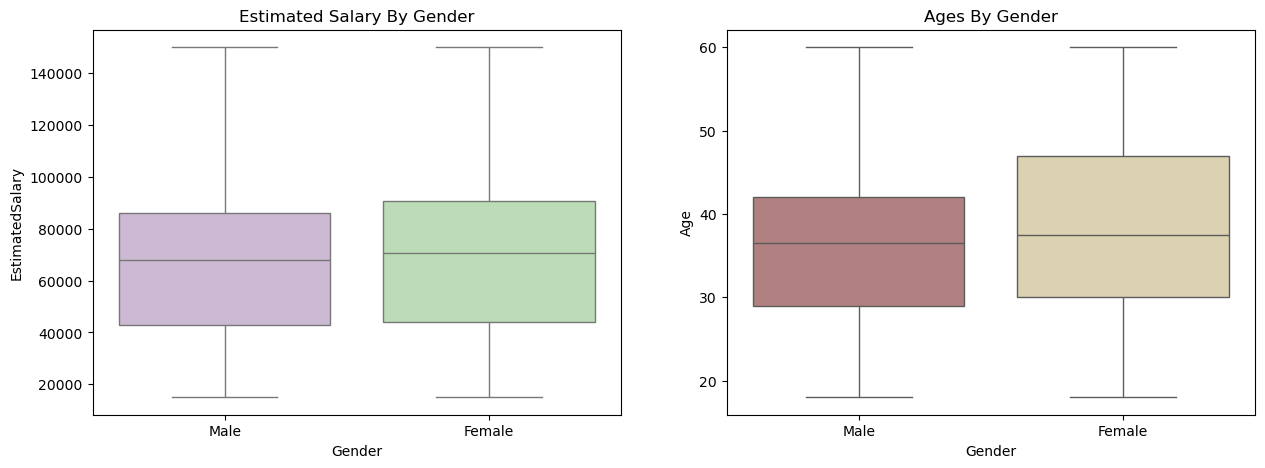

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax=axes[0],x=df['Gender'], y=df['EstimatedSalary'], palette="PRGn")
axes[0].set_title('Estimated Salary By Gender')

sns.boxplot(ax=axes[1],x=df['Gender'], y=df['Age'], palette="pink")
axes[1].set_title('Ages By Gender')
plt.show()

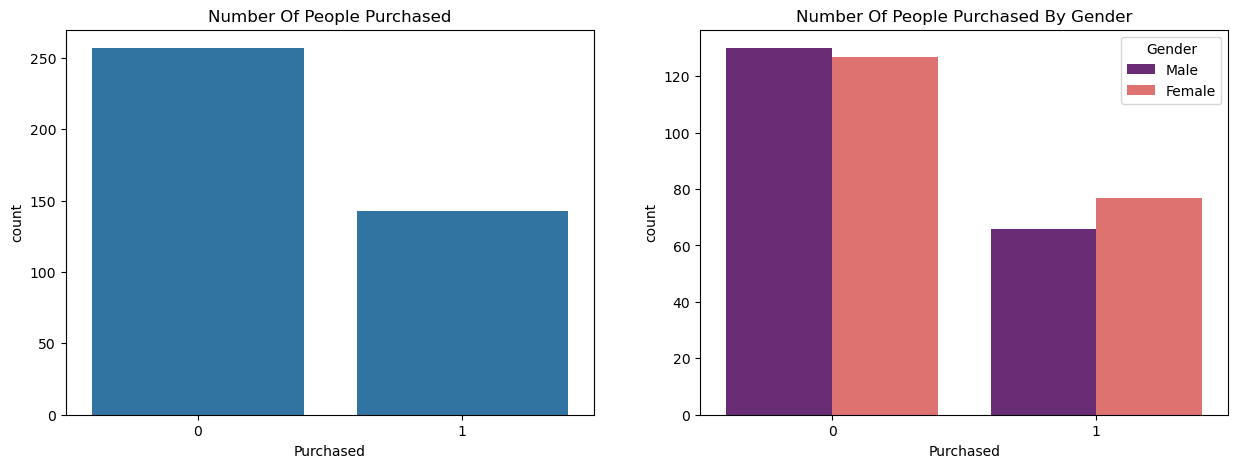

In [35]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(ax=axes[0],x='Purchased',data=df)
axes[0].set_title('Number Of People Purchased')
sns.countplot(ax=axes[1],x='Purchased',hue='Gender',data=df,palette="magma")
axes[1].set_title('Number Of People Purchased By Gender')
plt.show()

In [39]:
# Encode the 'Gender' column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
correlation_matrix
 

,Age,EstimatedSalary,Purchased,Gender_Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Gender_Male,-0.073741,-0.060435,-0.042469,1.000000


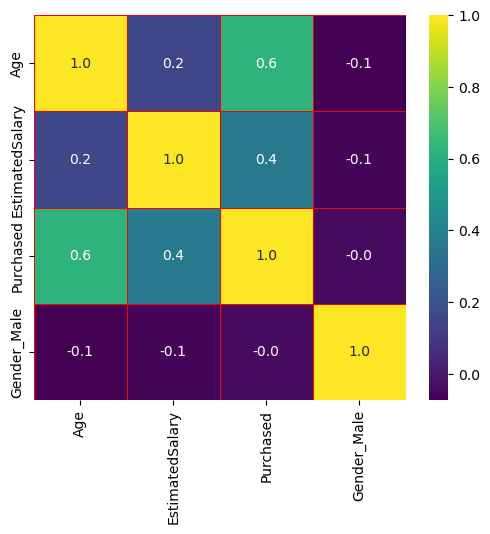

In [40]:
df = df_encoded
f,ax = plt.subplots(figsize=(6, 5))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap='viridis',ax=ax)
plt.show()

In [42]:
# set inputs and outputs
X = df.drop('Purchased',axis = 1)     
y = df['Purchased']

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(d_scaled,y,test_size=0.20,random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1,max_iter = 500)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [46]:
# y = B + W*x1...

print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[1.39046345 0.79305836 0.0621004 ]]
Bias : [-0.86853713]


In [48]:
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8625
Train accuracy: 0.8125


In [55]:
from sklearn.metrics import confusion_matrix
 
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame with better naming
df_cm = pd.DataFrame(cm, columns=['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])
 
df_cm


,Predicted Positive,Predicted Negative
Actual Positive,50,2
Actual Negative,9,19


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.8625
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

